# Ejercicio 4 – Sistema de recomendación simple de películas
### Proyecto de Análisis de Datos 2025-2
**Por: Jessica y Eduardo | Rama: Steph**



## 1. Carga y exploración general de los datos
En esta sección caragremos los datos de películas y calificaciones, revisaremos sus dimensiones, tipos de datos y si es que tieien valores nulos.

In [1]:
import polars as pl
import numpy as np

ratings_df = pl.read_csv("ratings.csv")
movies_df = pl.read_csv("movies.csv")
print(ratings_df.shape)
print(movies_df.shape)

(100836, 4)
(9742, 3)


In [2]:
#revisamos los tipos de datos por columna
print(ratings_df.dtypes)

print(movies_df.dtypes)

[Int64, Int64, Float64, Int64]
[Int64, String, String]


In [3]:
#revisamos si es que hay valores nulos
print(ratings_df.null_count())
print(movies_df.null_count())

shape: (1, 4)
┌────────┬─────────┬────────┬───────────┐
│ userId ┆ movieId ┆ rating ┆ timestamp │
│ ---    ┆ ---     ┆ ---    ┆ ---       │
│ u32    ┆ u32     ┆ u32    ┆ u32       │
╞════════╪═════════╪════════╪═══════════╡
│ 0      ┆ 0       ┆ 0      ┆ 0         │
└────────┴─────────┴────────┴───────────┘
shape: (1, 3)
┌─────────┬───────┬────────┐
│ movieId ┆ title ┆ genres │
│ ---     ┆ ---   ┆ ---    │
│ u32     ┆ u32   ┆ u32    │
╞═════════╪═══════╪════════╡
│ 0       ┆ 0     ┆ 0      │
└─────────┴───────┴────────┘


In [4]:
# vemos los primeros registras del dataset ratings y movies
print(ratings_df.head())
print(movies_df.head())

shape: (5, 4)
┌────────┬─────────┬────────┬───────────┐
│ userId ┆ movieId ┆ rating ┆ timestamp │
│ ---    ┆ ---     ┆ ---    ┆ ---       │
│ i64    ┆ i64     ┆ f64    ┆ i64       │
╞════════╪═════════╪════════╪═══════════╡
│ 1      ┆ 1       ┆ 4.0    ┆ 964982703 │
│ 1      ┆ 3       ┆ 4.0    ┆ 964981247 │
│ 1      ┆ 6       ┆ 4.0    ┆ 964982224 │
│ 1      ┆ 47      ┆ 5.0    ┆ 964983815 │
│ 1      ┆ 50      ┆ 5.0    ┆ 964982931 │
└────────┴─────────┴────────┴───────────┘
shape: (5, 3)
┌─────────┬─────────────────────────────────┬─────────────────────────────────┐
│ movieId ┆ title                           ┆ genres                          │
│ ---     ┆ ---                             ┆ ---                             │
│ i64     ┆ str                             ┆ str                             │
╞═════════╪═════════════════════════════════╪═════════════════════════════════╡
│ 1       ┆ Toy Story (1995)                ┆ Adventure|Animation|Children|C… │
│ 2       ┆ Jumanji (1995)    

## 2. Limpieza básica
En esta seccion eliminaremos duplicados y valores nulos que pueden afectar el análisis posterior.

In [5]:
# eliminamos los duplicados y valores nulos


ratings_df = ratings_df.unique().drop_nulls()
movies_df = movies_df.unique().drop_nulls()

## 3. Análisis exploratorio + visualización inicial
Uniremos la información de ratings y películas, transformamos el timestamp, y exploramos patrones por año, mes y género.

In [6]:
# unimos los ratings con los datos de las películas (join))
df = ratings_df.join(movies_df, on="movieId", how="inner")

In [7]:
#transformamos el timestamp en fecha y extraer año y mes
df = df.with_columns([
    (pl.col("timestamp") * 1000).cast(pl.Datetime("ms")).alias("datetime")
])
df = df.with_columns([
    pl.col("datetime").dt.year().alias("year"),
    pl.col("datetime").dt.month().alias("month")
])

In [8]:
#calificaones por año
df.group_by("year").agg(pl.count().alias("n_calificaciones")).sort("year")

/tmp/ipykernel_24272/4070509536.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  df.group_by("year").agg(pl.count().alias("n_calificaciones")).sort("year")


year,n_calificaciones
i32,u32
1996,6040
1997,1916
1998,507
1999,2439
2000,10061
…,…
2014,1439
2015,6616
2016,6703


In [9]:
#calificaiones por mes
df.group_by("month").agg(pl.count().alias("n_calificaciones")).sort("month")

/tmp/ipykernel_24272/1864306254.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  df.group_by("month").agg(pl.count().alias("n_calificaciones")).sort("month")


month,n_calificaciones
i8,u32
1,8684
2,7635
3,8880
4,7727
5,10883
…,…
8,9074
9,8510
10,7148


In [10]:
#separamos múltiples géneros por película
df_genres = df.with_columns([

    pl.col("genres").str.split("|").alias("genres_list")
    
]).explode("genres_list")

In [11]:
#obtenemos el promedio de calificación y conteo por género
df_genres.group_by("genres_list").agg([
    pl.col("rating").mean().alias("avg_rating"),
    pl.count().alias("n_calificaciones")
]).sort("avg_rating", descending=True)

/tmp/ipykernel_24272/667415679.py:4: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("n_calificaciones")


genres_list,avg_rating,n_calificaciones
str,f64,u32
"""Film-Noir""",3.920115,870
"""War""",3.808294,4859
"""Documentary""",3.797785,1219
"""Crime""",3.658294,16681
"""Drama""",3.656184,41928
…,…,…
"""Sci-Fi""",3.455721,17243
"""Action""",3.447984,30635
"""Children""",3.412956,9208


## 4. Preprocesamiento técnico
Construimos una matriz de utilidad usuario-película para alimentar el modelo.

In [12]:
#creamos una matriz de utilidad
pivot_df = df.select(["userId", "movieId", "rating"])
user_movie_matrix = pivot_df.pivot(values="rating", index="userId", columns="movieId")
user_movie_matrix = user_movie_matrix.fill_null(0)

/tmp/ipykernel_24272/4050313964.py:3: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  user_movie_matrix = pivot_df.pivot(values="rating", index="userId", columns="movieId")


## 5. Entrenamiento del modelo de ML (KNN)
ENtrenamos un modelo KNN basado en la similitud entre usuarios usando coseno

In [13]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix


ratings_matrix = csr_matrix(user_movie_matrix.to_numpy())

model_knn = NearestNeighbors(metric="cosine", algorithm="brute")

model_knn.fit(ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

## 6. Evaluación del modelo
Evaluamos el sistema por su cobertura (usuarios y películas disponibles).

In [14]:
# Métrica de cobertura
n_users, n_movies = user_movie_matrix.shape
print(f"Usuarios: {n_users}, Películas: {n_movies}")

Usuarios: 610, Películas: 9725


## 7. Visualización de resultados y métricas
Generamos un heatmap de similitud para ver la estructura entre usuarios.

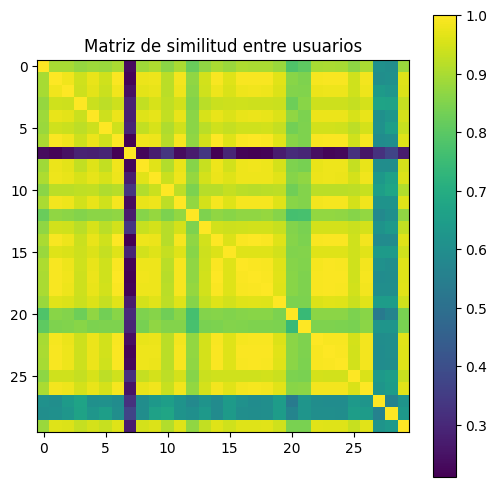

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

similarity_matrix = cosine_similarity(ratings_matrix)
plt.figure(figsize=(6,6))
plt.imshow(similarity_matrix[:30, :30], cmap="viridis")
plt.colorbar()
plt.title("Matriz de similitud entre usuarios")
plt.show()